# LAB 1

In [1]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt

x = loadmat('ct.mat')

# select variable 'ct' and convert it from dictionary to numpy array
ct = np.array(x['ct'])

[rows, cols, slices] = ct.shape
print(rows, cols, slices)

512 512 256


### **Question 1**
Display a histogram of the CT image intensities (i.e. CT indexes), and then a histogram
of the corresponding attenuation coefficients, by converting CT indexes to attenuation
coefficients.

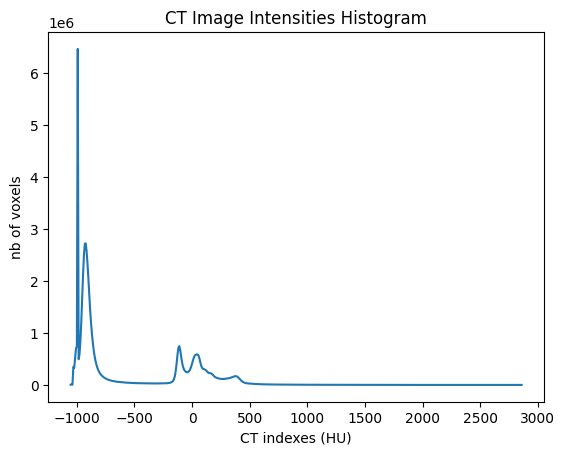

In [25]:
# creating the ct histogram
histogram, bin_edges = np.histogram(ct, bins=512)
# configurating and drawing the histogram figure
plt.figure()
plt.title("CT Image Intensities Histogram")
plt.xlabel("CT indexes (HU)")
plt.ylabel("nb of voxels")
plt.plot(bin_edges[0:-1], histogram)

In [5]:
# convert ct indexes into attenuation coefficients
# attenuation coefficient of water in mm^-1
uH2O = 0.0206
# based on CT index definition from the handout
u = uH2O * (1+ct/1000)

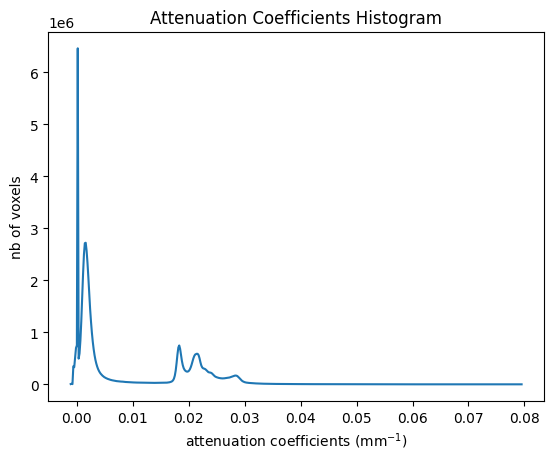

In [26]:
# creating the attenuation coefficients histogram
histogram, bin_edges = np.histogram(u, bins=512)
# configurating and drawing the histogram figure
plt.figure()
plt.title("Attenuation Coefficients Histogram")
plt.xlabel("attenuation coefficients (mm$^{-1}$)")
plt.ylabel("nb of voxels")
plt.plot(bin_edges[0:-1], histogram)

### **Question 2**
Display 9 representative slices of the image of attenuation coefficients for each
orientation - axial (x,y), sagittal (x,z) and coronal (y,z).

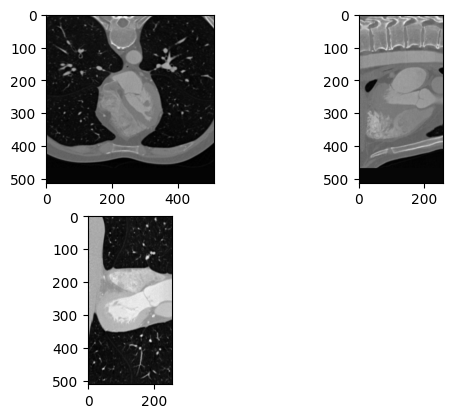

In [7]:
#selecting slices to study appropriate rotations and adquate intensity scales
ax_slice = u[:,:,slices//2]
sag_slice = u[:, cols//2, :]
cor_slice = u[rows//2, :, :]

plt.figure("Mid Orthogonal Slices")
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap="gray")
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap="gray")
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap="gray")

The axial slice needs to be flipped **180** $^\circ$ because the sternum has to be on the top part of the image. Similarly,the sagital slice needs to be flipped **90** $^\circ$ because the sternum has to be on the right part of the image. Finally, the coronal slice needs to be flipped **90** $^\circ$ because the largest part of the heart has to be on the bottom part of the image.

In [8]:
#Axial Slice
ax_slice=np.flipud(ax_slice)
#Sagital Slice
sag_slice=np.rot90(sag_slice)
#Coronal Slice
cor_slice=np.rot90(cor_slice)

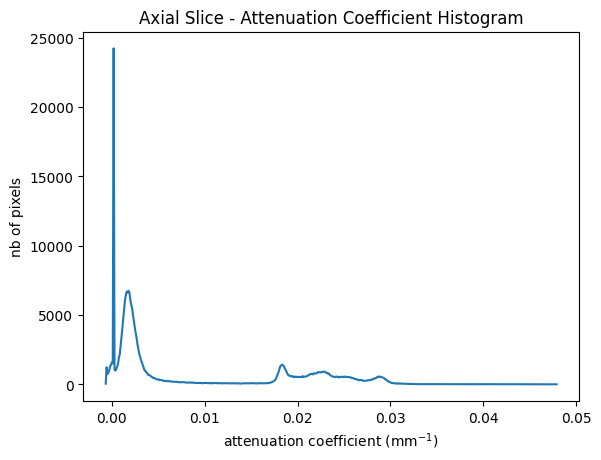

In [9]:
# Axial Slice
# create the histogram to study the attenuation coefficient range
histogram, bin_edges = np.histogram(ax_slice, bins=512) 
# nrm of ideal bins is the square root of the nb of data points
# configure and draw the histogram figure
plt.figure()
plt.title("Axial Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient (mm$^{-1}$)")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

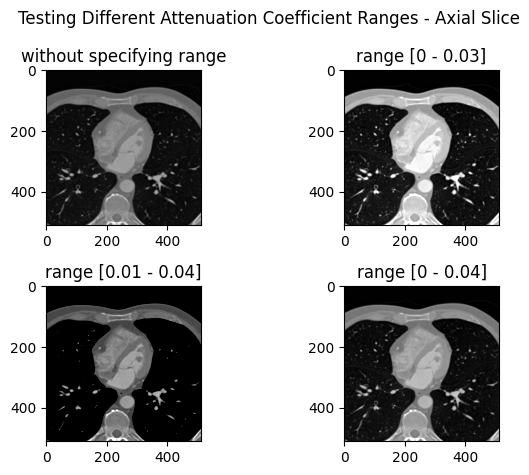

In [10]:
# let's try again setting the different attenuation coefficient ranges
fig= plt.figure('Axial Slice - readjusting scale')
st = fig.suptitle("Testing Different Attenuation Coefficient Ranges - Axial Slice")
plt.subplot(2, 2, 1)
plt.imshow(ax_slice, cmap='gray')
plt.title('without specifying range')
plt.subplot(2, 2, 2)
plt.imshow(ax_slice, cmap='gray', vmin=0, vmax=0.03)
plt.title('range [0 - 0.03]')
plt.subplot(2, 2, 3)
plt.imshow(ax_slice, cmap='gray', vmin=0.01, vmax=0.04)
plt.title('range [0.01 - 0.04]')
plt.subplot(2, 2, 4)
plt.imshow(ax_slice, cmap='gray', vmin=0, vmax=0.04) 
plt.title('range [0 - 0.04]')
plt.tight_layout()

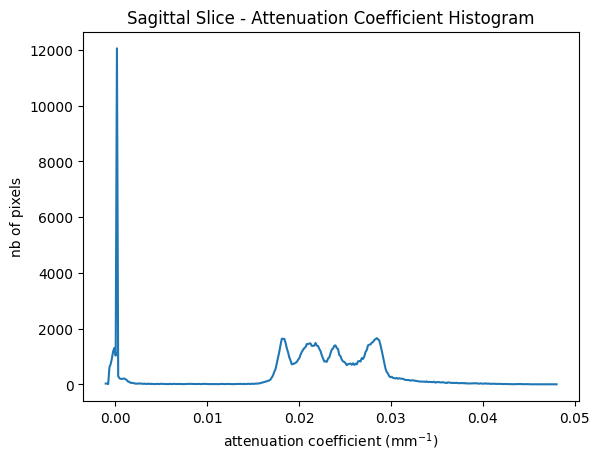

In [12]:
# Sagittal Slice
histogram, bin_edges = np.histogram(sag_slice, bins=362)
plt.figure()
plt.title("Sagittal Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient (mm$^{-1}$)")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

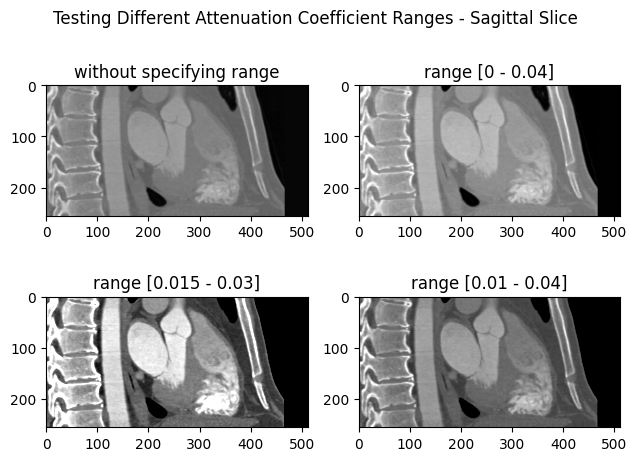

In [13]:
# let's try again setting different attenuation coefficient ranges 
fig= plt.figure('Sagittal Slice - readjusting scale')
st = fig.suptitle("Testing Different Attenuation Coefficient Ranges - Sagittal Slice")

plt.subplot(2, 2, 1)
plt.imshow(sag_slice, cmap='gray')
plt.title('without specifying range')
plt.subplot(2, 2, 2)
plt.imshow(sag_slice, cmap='gray', vmin=0, vmax=0.04)
plt.title('range [0 - 0.04]')
plt.subplot(2, 2, 3)
plt.imshow(sag_slice, cmap='gray', vmin=0.015, vmax=0.03)
plt.title('range [0.015 - 0.03]')
plt.subplot(2, 2, 4)
plt.imshow(sag_slice, cmap='gray', vmin=0.01, vmax=0.04)
plt.title('range [0.01 - 0.04]')
plt.tight_layout()

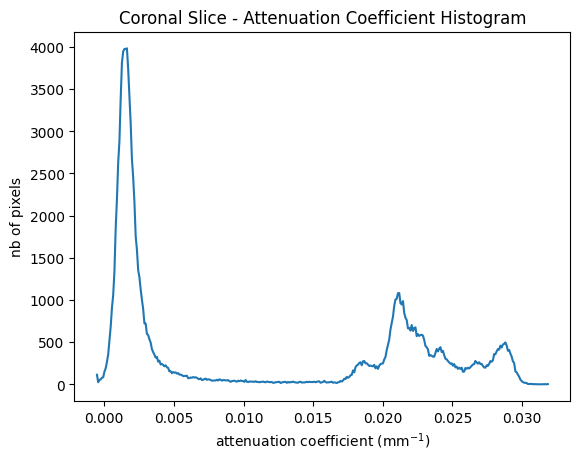

In [14]:
# Coronal Slice
histogram, bin_edges = np.histogram(cor_slice, bins=362)
plt.figure()
plt.title("Coronal Slice - Attenuation Coefficient Histogram")
plt.xlabel("attenuation coefficient (mm$^{-1}$)")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

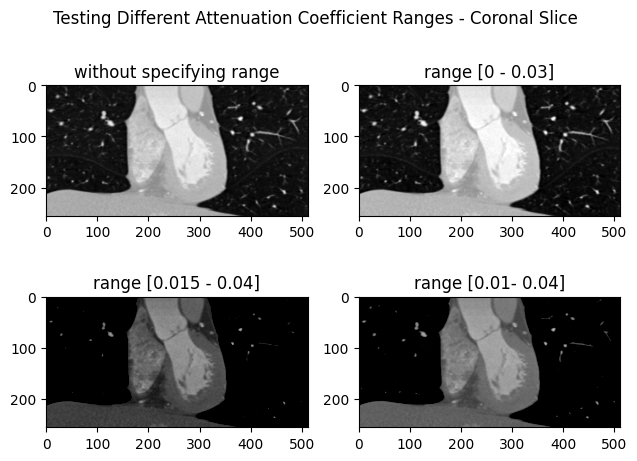

In [15]:
# let's try again setting different attenuation coefficient ranges
fig= plt.figure('Coronal Slice - readjusting scale')
st = fig.suptitle("Testing Different Attenuation Coefficient Ranges - Coronal Slice")
plt.subplot(2, 2, 1)
plt.imshow(cor_slice, cmap='gray')
plt.title('without specifying range')
plt.subplot(2, 2, 2)
plt.imshow(cor_slice, cmap='gray', vmin=0, vmax=0.03)
plt.title('range [0 - 0.03]')
plt.subplot(2, 2, 3)
plt.imshow(cor_slice, cmap='gray', vmin=0.015, vmax=0.04) 
plt.title('range [0.015 - 0.04]')
plt.subplot(2, 2, 4)
plt.imshow(cor_slice, cmap='gray', vmin=0.010, vmax=0.04)
plt.title('range [0.01- 0.04]')
plt.tight_layout()

For the axial, sagittal and coronal slices, we decided to set the attenuation coefficient range to **[0.01-0.04]**.

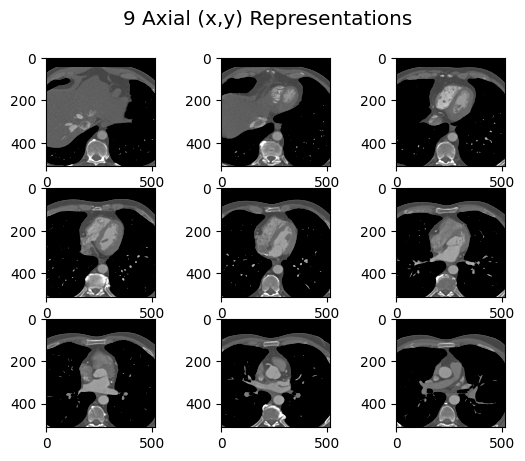

In [16]:
#Finally, let's show the representations
#Axial
jump_ax=slices//9
fig = plt.figure()
st = fig.suptitle("9 Axial (x,y) Representations", fontsize="x-large")
for i in range(9):
    sl= jump_ax*i
    ax_sl = np.flipud(u[:,:,sl])
    plt.subplot(3,3,i+1)
    plt.imshow(ax_sl, cmap='gray', vmin=0.01, vmax=0.04)
    

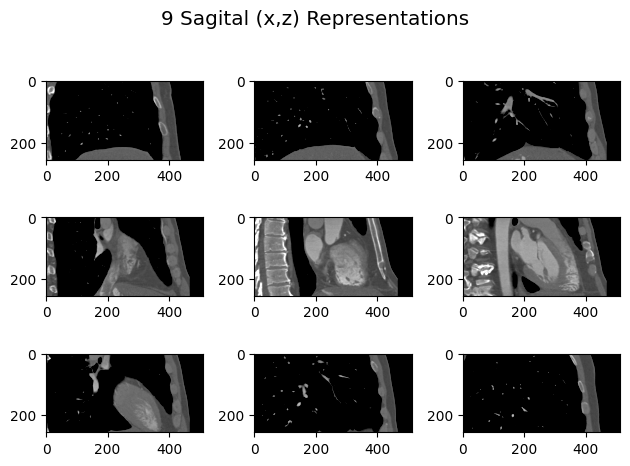

In [17]:
#Sagittal
jump_sag=cols//9
fig = plt.figure()
st = fig.suptitle("9 Sagital (x,z) Representations", fontsize="x-large")
for i in range(9):
    col= jump_sag*i
    sag_col = np.rot90(u[:,col,:])
    plt.subplot(3,3,i+1)
    plt.imshow(sag_col, cmap='gray', vmin=0.01, vmax=0.04)
    plt.tight_layout()

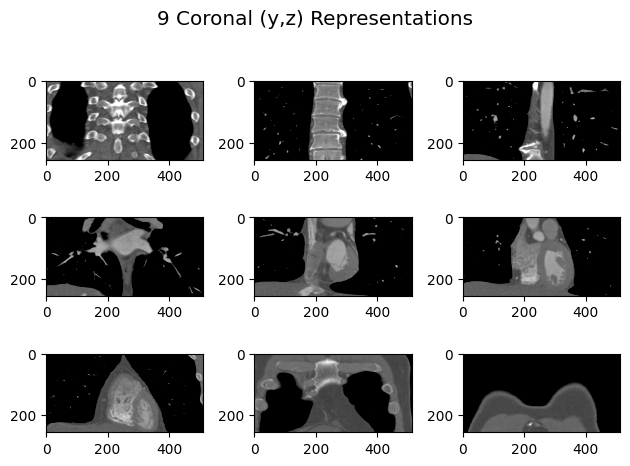

In [18]:
#Coronal
jump_cor=rows//9
fig = plt.figure()
st = fig.suptitle("9 Coronal (y,z) Representations", fontsize="x-large")
for i in range(9):
    row= jump_cor*i
    cor_row = np.rot90(u[row,:,:])
    plt.subplot(3,3,i+1)
    plt.imshow(cor_row, cmap='gray', vmin=0.01, vmax=0.04)
    plt.tight_layout()

### **Question 3**
Simulate the planar X-ray image that would be obtained by projection along x, assuming
that the incident X-ray beam has an intensity I$_{0}$ = 1200 photons/pixel.

In [20]:
# voxel depth
depth = 250/slices #(in mm)
# voxel width
width = 190/rows #(in mm)
# voxel width
height = 190/cols #(in mm)

# print voxel dimensions 
print('Voxel dimensions (width,height,depth) (in mm): ', width, height, depth)

Voxel dimensions (width,height,depth) (in mm):  0.37109375 0.37109375 0.9765625


In [21]:
I0 = 1200 # photons per pixel
dx = width # direction in each we're projecting from

# Attenuation Equation 
# a_eq = I0 * np.exp(-sum(u(x,y,z))*dx)

# Rationale: in each pixel we place the sum of the attenuation coefficients (for that pixel in each slice) in a 2D matrix. 
# then we adjust the intensity with the attenuation equation along x.

proj = np.zeros([cols,slices])

for i in range(slices): 
    for j in range(cols):
        for k in range(rows):
            proj[j,i] = proj[j,i] + u[k,j,i]  # proj becomes a 2D matrix with the sum of each row's attenuation coefficient in each pixel
        proj[j,i] = I0*np.exp(-proj[j,i]*dx) # calculate the new intensity of each pixel by adjusting the initial intensity with exp(-sum(miu(x,y,z))*dx)




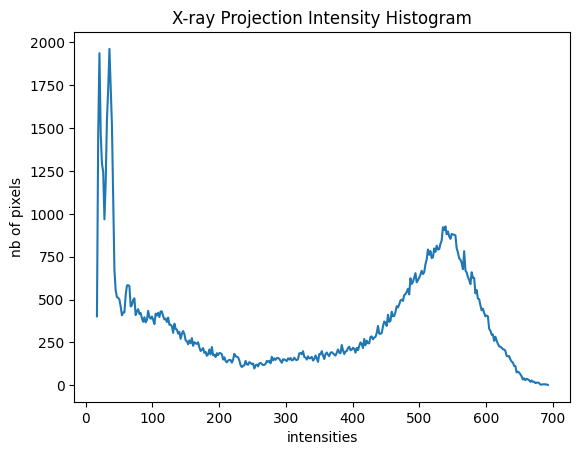

In [22]:
# creating the ct histogram
histogram, bin_edges = np.histogram(proj, bins=362)
# configurating and drawing the histogram figure
plt.figure()
plt.title("X-ray Projection Intensity Histogram")
plt.xlabel("intensities")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

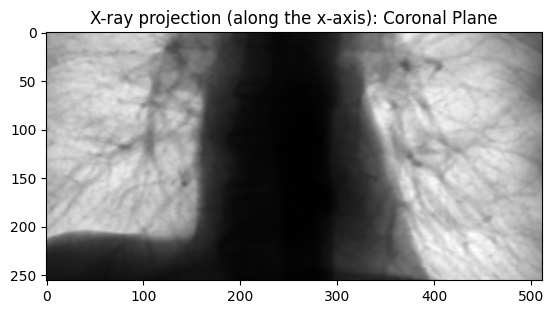

In [23]:
plt.figure("Projection along the x axis")
plt.title("X-ray projection (along the x-axis): Coronal Plane")
xray = np.rot90(proj)
plt.imshow(xray, cmap='gray')

### **Question 4**
Now simulate the planar X-ray image that would be obtained by:


a. Projection along x but using twice the X-ray tube current intensity: what
changed? 

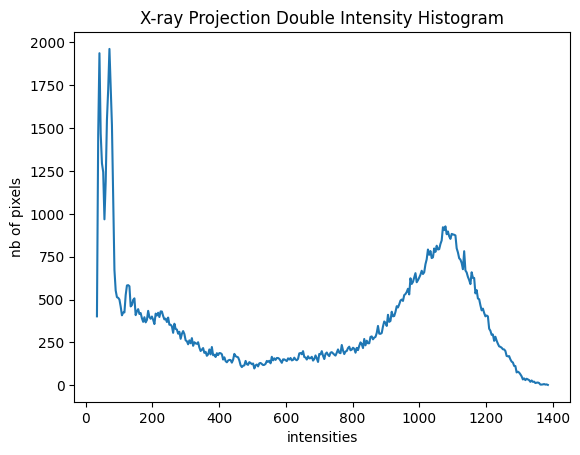

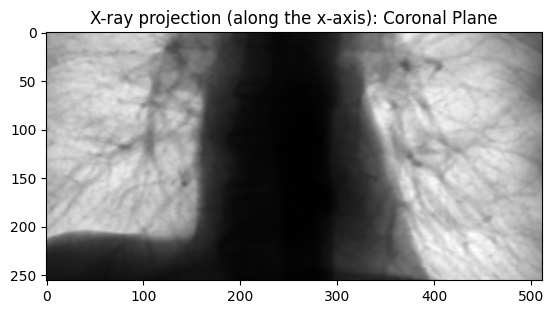

In [27]:
double_I0 = 2400 # photons per pixel
dx = width # direction in each we're projecting from

# Attenuation Equation 
# a_eq = I0 * np.exp(-sum(u(x,y,z))*dx)

# Rationale: in each pixel we place the sum of the attenuation coefficients (for that pixel in each slice) in a 2D matrix. 
# then we adjust the intensity with the attenuation equation along x.

double_proj = np.zeros([cols,slices])

for i in range(slices): 
    for j in range(cols):
        for k in range(rows):
            double_proj[j,i] = double_proj[j,i] + u[k,j,i]  # proj becomes a 2D matrix with the sum of each row's attenuation coefficient in each pixel
        double_proj[j,i] = double_I0*np.exp(-double_proj[j,i]*dx) # calculate the new intensity of each pixel by adjusting the initial intensity with exp(-sum(miu(x,y,z))*dx)

# creating the ct histogram
histogram, bin_edges = np.histogram(double_proj, bins=362)
# configurating and drawing the histogram figure
plt.figure()
plt.title("X-ray Projection Double Intensity Histogram")
plt.xlabel("intensities")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

plt.figure("Projection along the x axis")
plt.title("X-ray projection (along the x-axis): Coronal Plane")
double_xray = np.rot90(double_proj)
plt.imshow(double_xray, cmap='gray')

By doubling the X-ray tube current intensity, the X-ray intensity range doubles, as can be seen by comparing the histograms. This was expected since X-ray intensity is proportional to tube current.

b) Projection along y

In [21]:
dy = height
y_proj = np.zeros([rows,slices])
for i in range(slices): # go by slice
    for j in range(rows):
        for k in range(cols):
            y_proj[j,i] = y_proj[j,i] + u[j,k,i] # proj becomes a 2D matrix with the sum of each cols' attenuation coefficient in each pixel
        y_proj[j,i] = I0*np.exp(-y_proj[j,i]*dy) # calculate the new intensity of each pixel by adjusting the initial intensity with exp(-sum(miu(x,y,z))*dx)

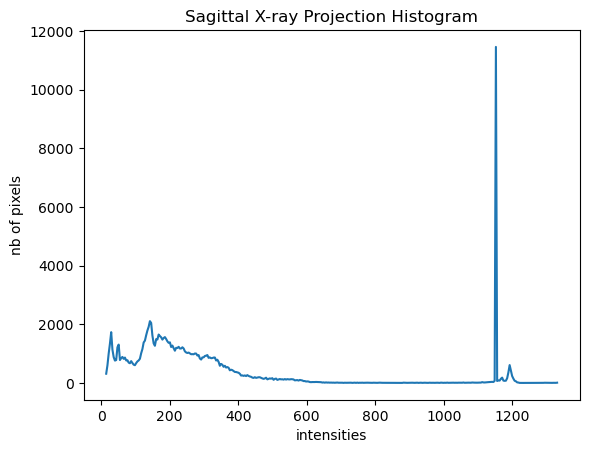

In [26]:
y_xray = np.rot90(y_proj)
histogram, bin_edges = np.histogram(y_xray, bins=362)
plt.figure()
plt.title("Sagittal X-ray Projection Histogram")
plt.xlabel("intensities")
plt.ylabel("nb of pixels")
plt.plot(bin_edges[0:-1], histogram)

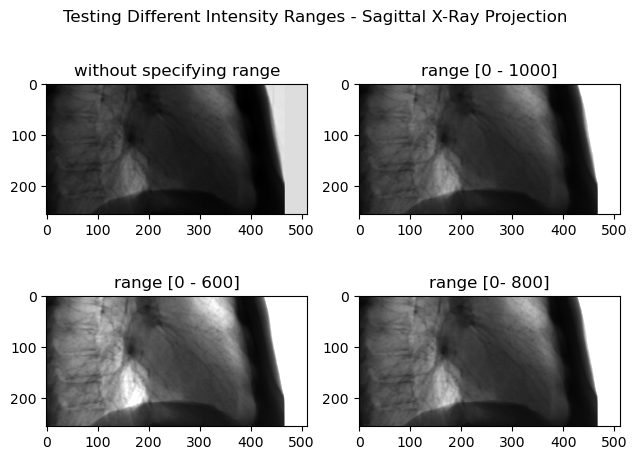

In [34]:
# let's try again setting different intensity ranges
fig= plt.figure('Y Projection - readjusting scale')
st = fig.suptitle("Testing Different Intensity Ranges - Sagittal X-Ray Projection")
plt.subplot(2, 2, 1)
plt.imshow(y_xray, cmap='gray')
plt.title('without specifying range')
plt.subplot(2, 2, 2)
plt.imshow(y_xray, cmap='gray', vmin=0, vmax=1000)
plt.title('range [0 - 1000]')
plt.subplot(2, 2, 3)
plt.imshow(y_xray, cmap='gray', vmin=0, vmax=600) 
plt.title('range [0 - 600]')
plt.subplot(2, 2, 4)
plt.imshow(y_xray, cmap='gray', vmin=0, vmax=800)
plt.title('range [0- 800]')
plt.tight_layout()

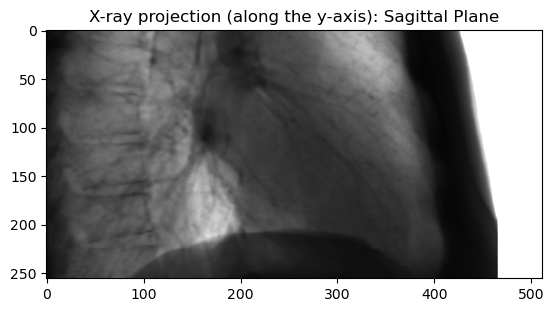

In [35]:
plt.figure("Projection along the y axis")
plt.title("X-ray projection (along the y-axis): Sagittal Plane")
y_xray = np.rot90(y_proj)
plt.imshow(y_xray,cmap='gray', vmin=0, vmax=800)